In [1]:
library(lattice)

** Sample Data **

In [2]:
# sample dataframe
df <- data.frame(
    Name = c("a", "b", "c"),
    Value = c(1, 2, 3))
df

Name,Value
a,1
b,2
c,3


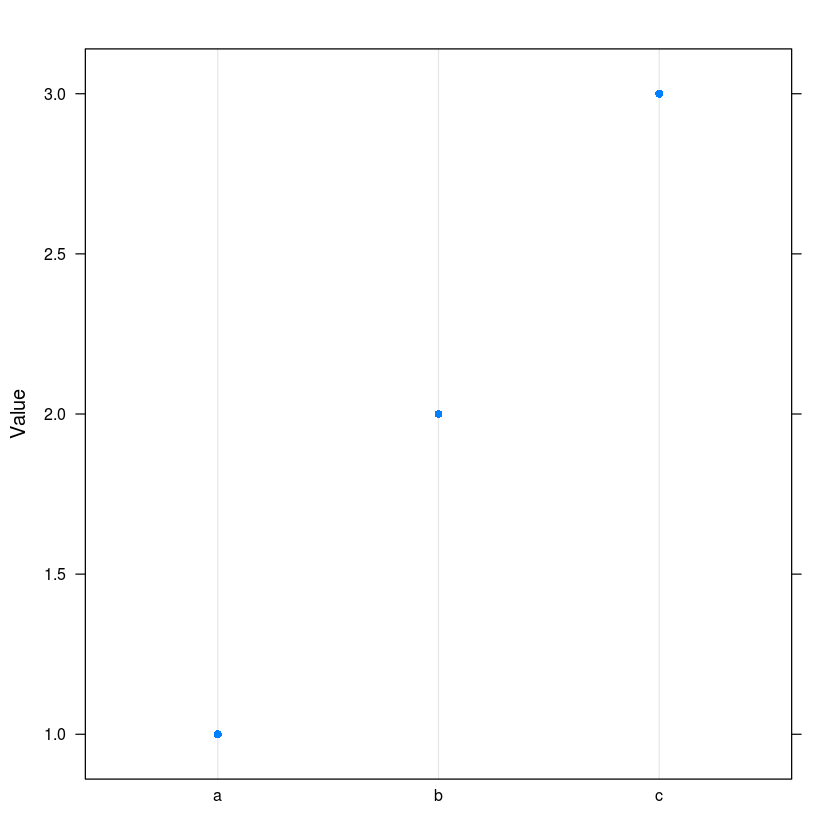

In [3]:
# Plot with defaults
dotplot(
    x = Value ~ Name,
    data = df)

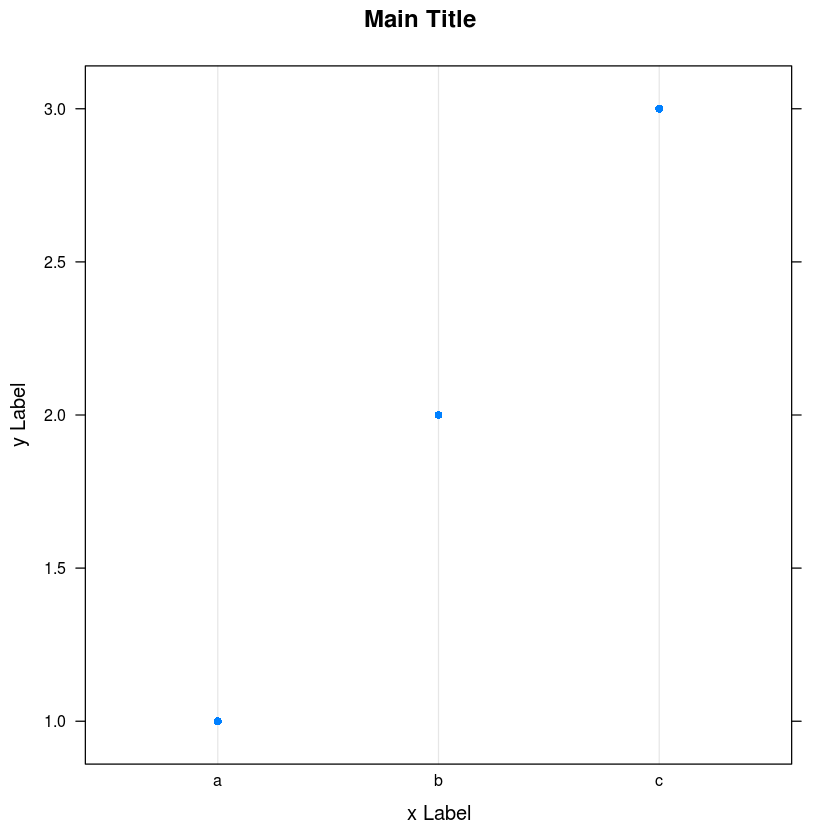

In [4]:
# Plot with parameters
dotplot(
    x = Value ~ Name,
    data = df,
    main = "Main Title",
    xlab = "x Label",
    ylab = "y Label")

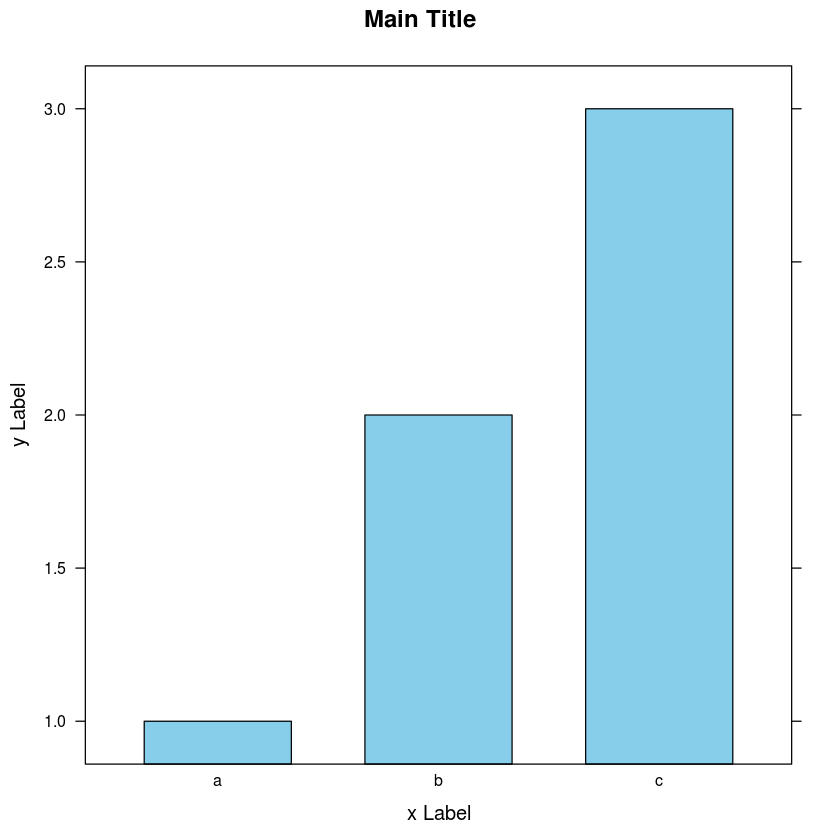

In [5]:
# Create a bar chart
barchart(
    x = Value ~ Name,
    data = df,
    col = "skyblue",
    main = "Main Title",
    xlab = "x Label",
    ylab = "y Label")

** Qualitative Univariate Analysis **

In [147]:
movies <- read.csv("movie_metadata.csv", na.strings="", stringsAsFactors=FALSE)
movies$content_rating <- as.factor(movies$content_rating)
movies$language <- as.factor(movies$language)
movies$color <- as.factor(movies$color)
movies$gross <- as.numeric(movies$gross)
movies$gross <-(movies$gross/1000000)
str(movies)

'data.frame':	5043 obs. of  28 variables:
 $ color                    : Factor w/ 2 levels " Black and White",..: 2 2 2 2 NA 2 2 2 2 2 ...
 $ director_name            : chr  "James Cameron" "Gore Verbinski" "Sam Mendes" "Christopher Nolan" ...
 $ num_critic_for_reviews   : int  723 302 602 813 NA 462 392 324 635 375 ...
 $ duration                 : int  178 169 148 164 NA 132 156 100 141 153 ...
 $ director_facebook_likes  : int  0 563 0 22000 131 475 0 15 0 282 ...
 $ actor_3_facebook_likes   : int  855 1000 161 23000 NA 530 4000 284 19000 10000 ...
 $ actor_2_name             : chr  "Joel David Moore" "Orlando Bloom" "Rory Kinnear" "Christian Bale" ...
 $ actor_1_facebook_likes   : int  1000 40000 11000 27000 131 640 24000 799 26000 25000 ...
 $ gross                    : num  761 309 200 448 NA ...
 $ genres                   : chr  "Action|Adventure|Fantasy|Sci-Fi" "Action|Adventure|Fantasy" "Action|Adventure|Thriller" "Action|Thriller" ...
 $ actor_1_name             : chr  "CCH 

In [24]:
# Create frequency table of ratings
movies <- movies[movies$content_rating %in% c("G", "Not Rated", "PG", "PG-13", "R", "TV-14"),]
#unique(movies$content_rating)
table <- table(movies$content_rating)
table <- table[c("G", "Not Rated", "PG", "PG-13", "R", "TV-14")]
ratings <- as.data.frame(table)
names(ratings)[1] <- "Rating"
names(ratings)[2] <- "Count"

ratings

Rating,Count
G,112
Not Rated,116
PG,701
PG-13,1461
R,2118
TV-14,30


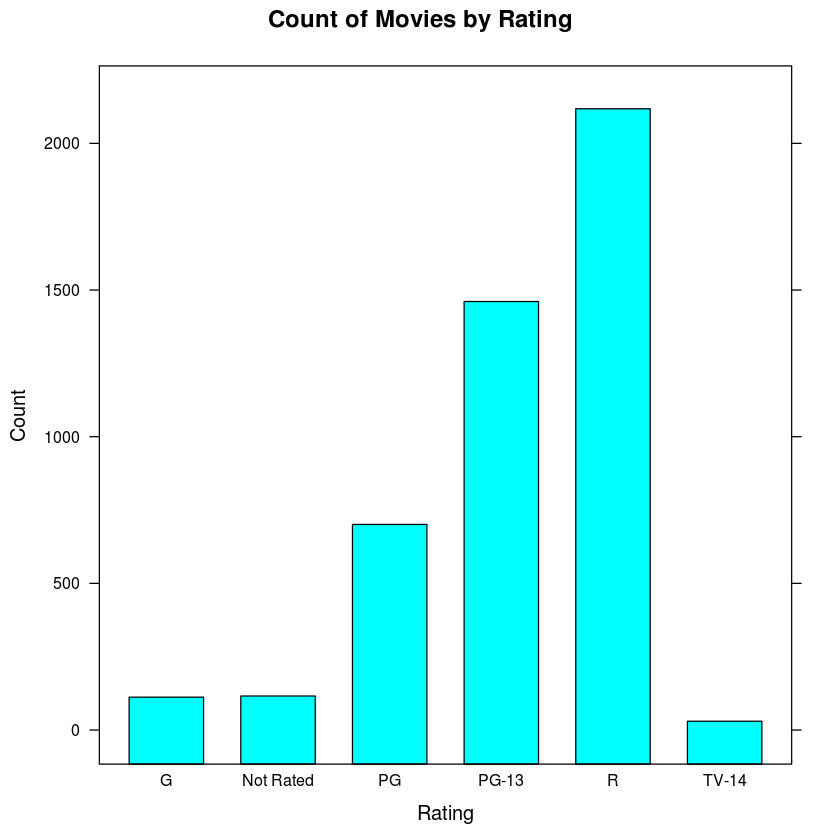

In [25]:
# Create a frequency bar chart
barchart(
    x = Count ~ Rating,
    data = ratings,
    main = "Count of Movies by Rating",
    xlab = "Rating")

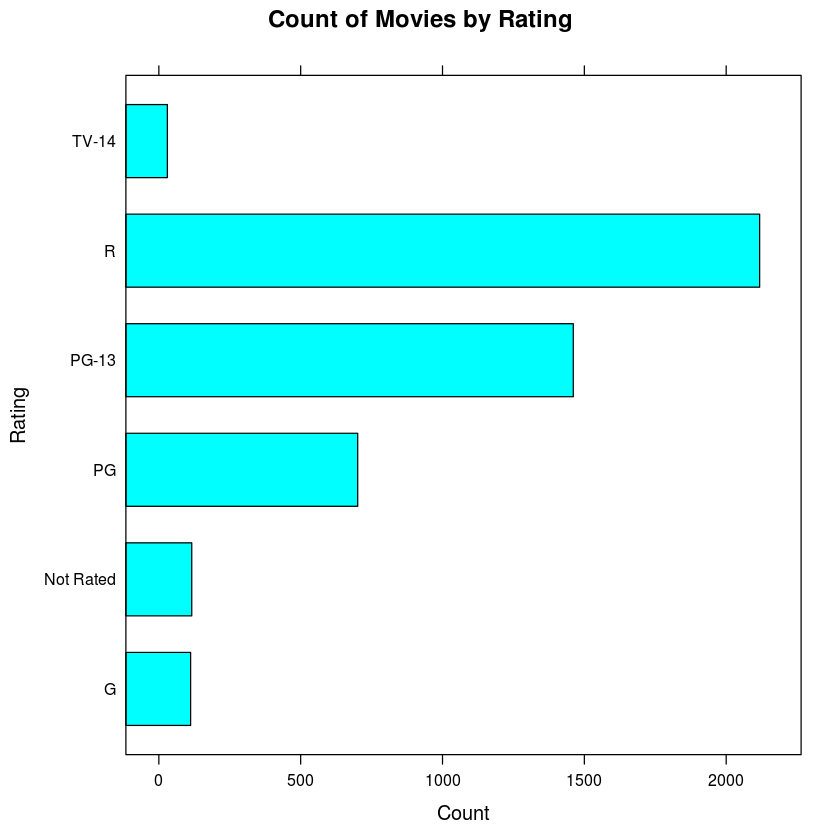

In [26]:
# Create a horizontal bar chart
barchart(
    x = Rating ~ Count,
    data = ratings,
    main = "Count of Movies by Rating",
    ylab = "Rating")

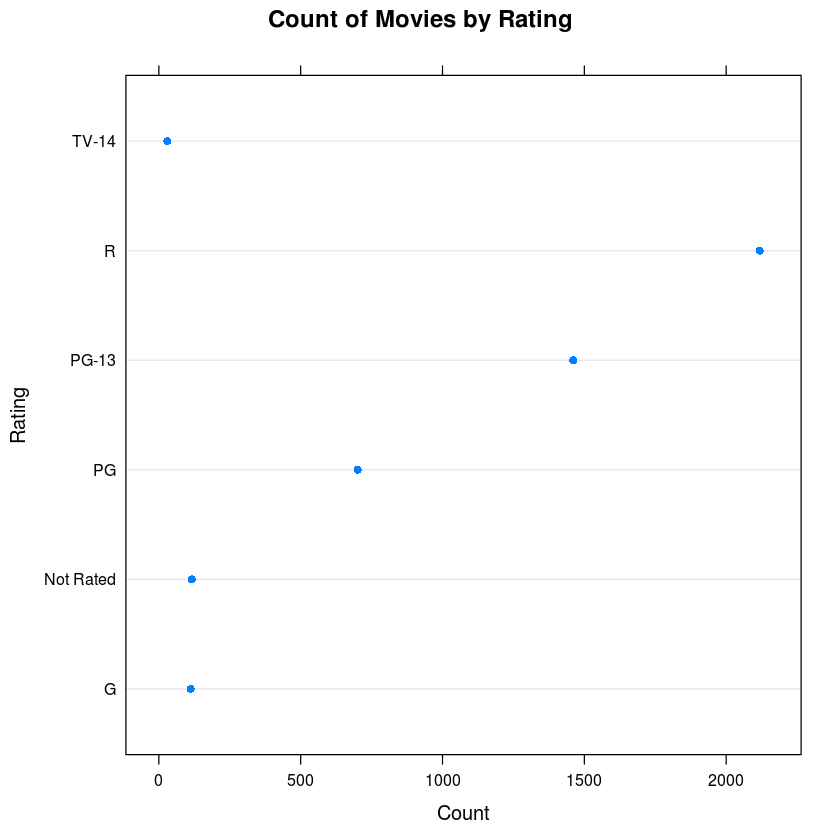

In [27]:
# Create Cleveland dot plot
dotplot(
    x = Rating ~ Count,
    data = ratings,
    main = "Count of Movies by Rating",
    ylab = "Rating")

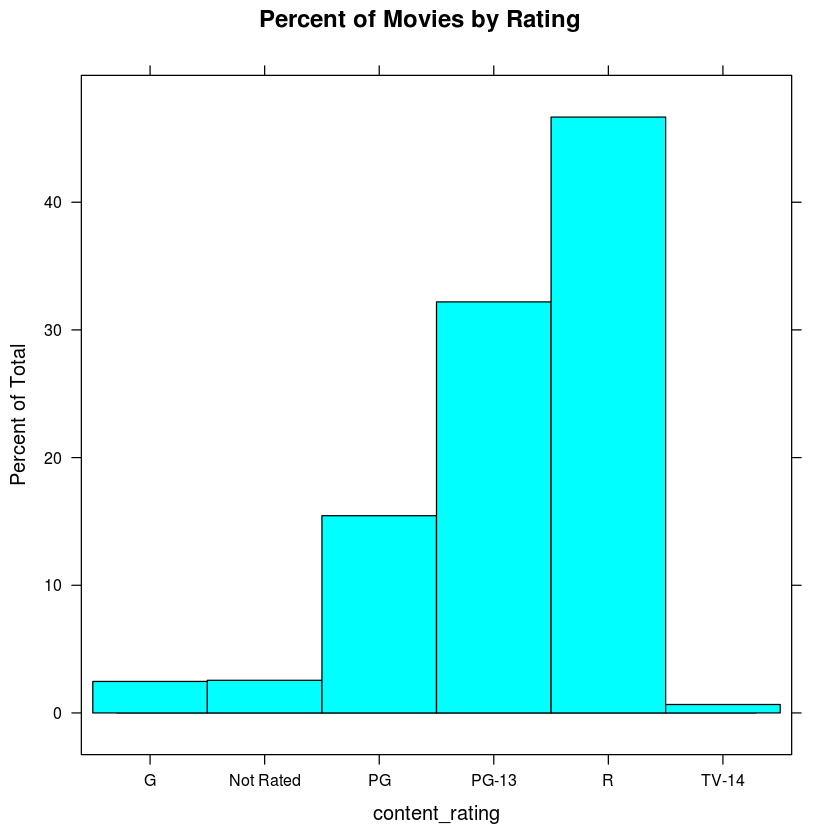

In [29]:
# Create a part-of-whole frequency bar chart
histogram(
    x = ~content_rating,
    data = movies,
    main = "Percent of Movies by Rating")

**Visualizing single numeric variable**

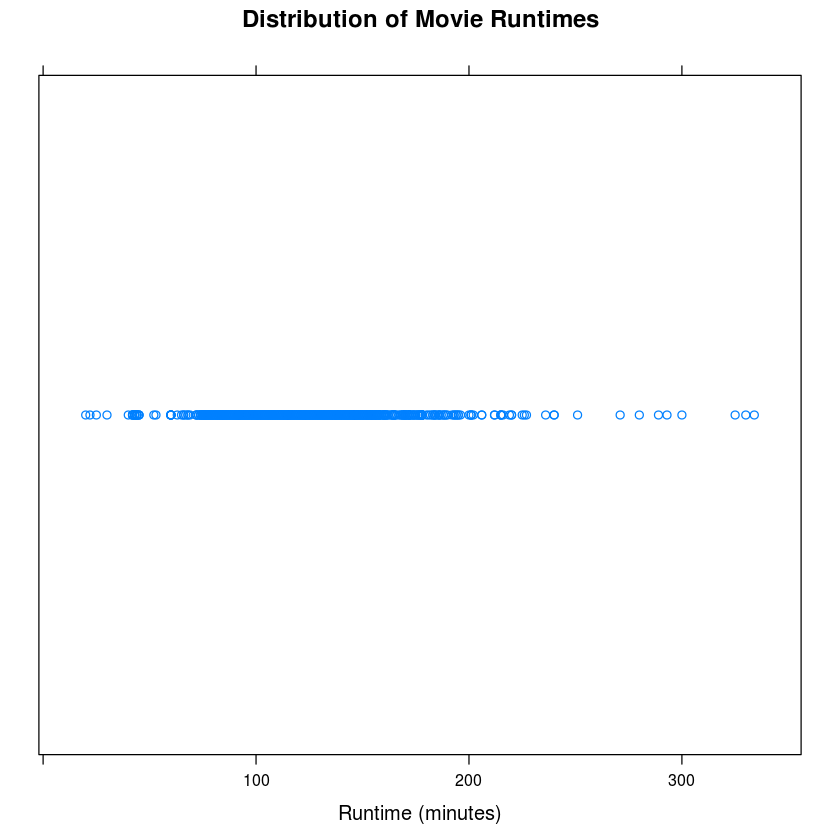

In [31]:
# Create dot plot for runtime
stripplot(
    x = ~duration,
    data = movies,
    main = "Distribution of Movie Runtimes",
    xlab = "Runtime (minutes)")

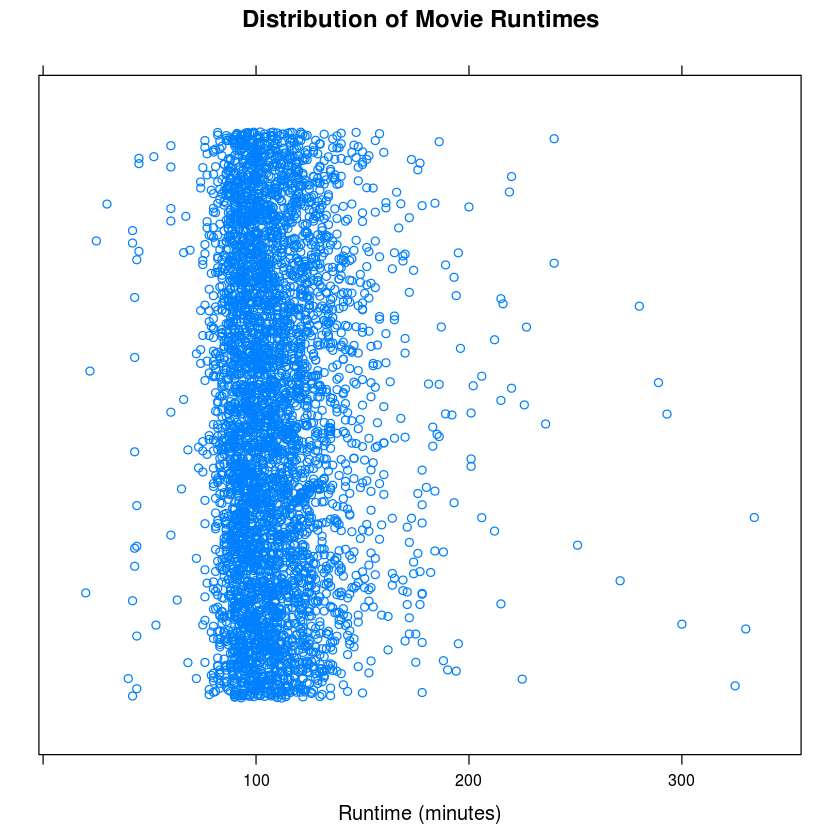

In [32]:
# Create dot plot with jitter
stripplot(
    x = ~duration,
    data = movies,
    jitter = TRUE, 
    amount = 0.5,
    main = "Distribution of Movie Runtimes",
    xlab = "Runtime (minutes)")

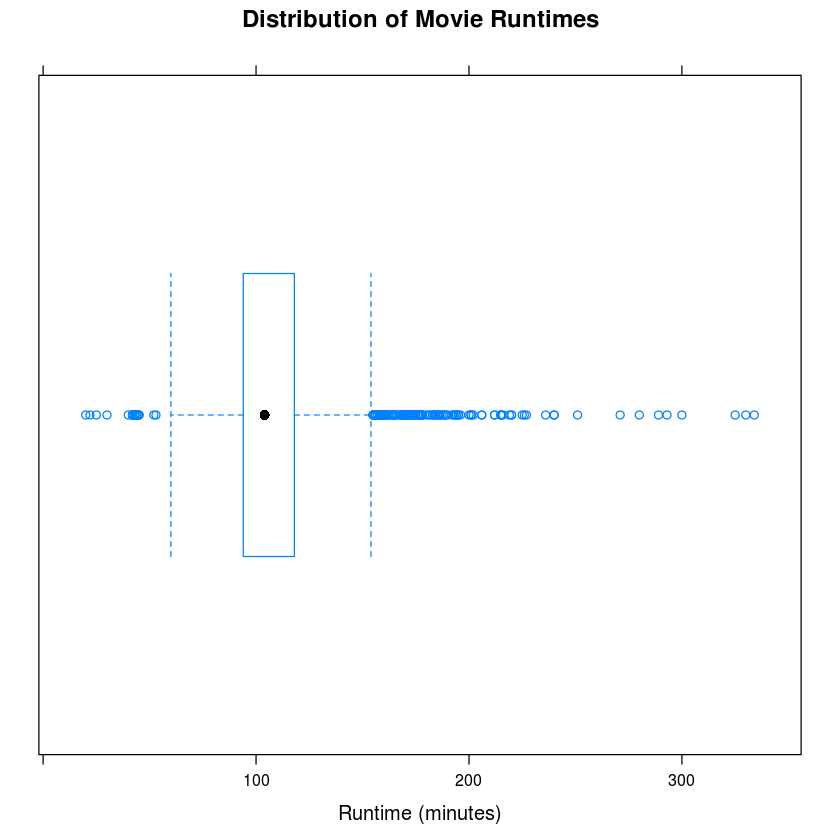

In [33]:
# Create box plot with lattice
bwplot(
    x = ~duration,
    data = movies,
    main = "Distribution of Movie Runtimes",
    xlab = "Runtime (minutes)")

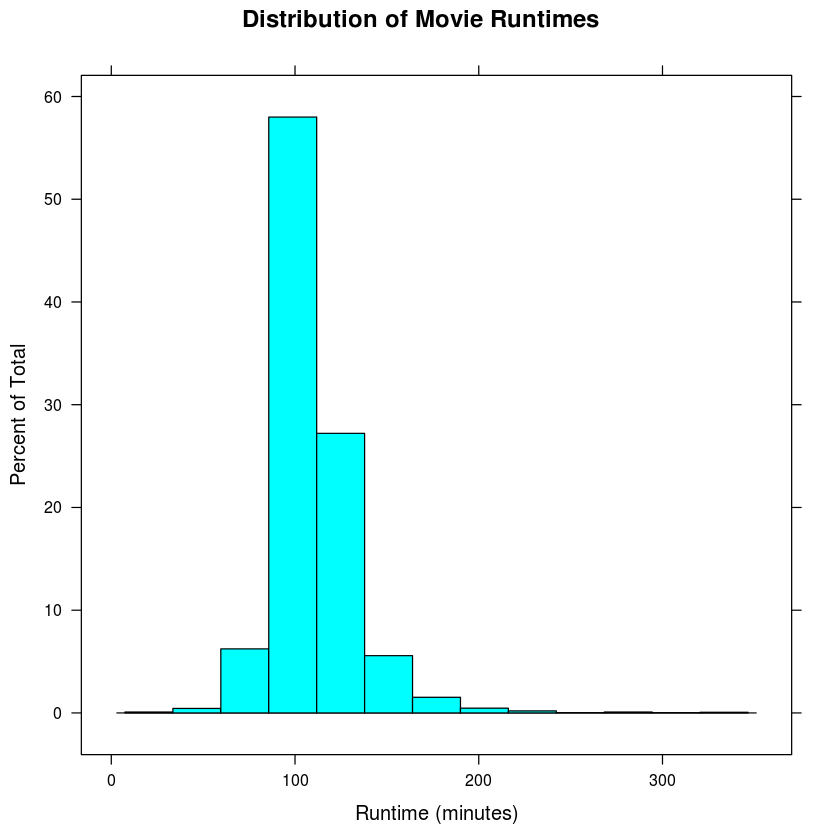

In [34]:
# Create histogram with lattice
histogram(
    x = ~duration,
    data = movies,
    main = "Distribution of Movie Runtimes",
    xlab = "Runtime (minutes)")

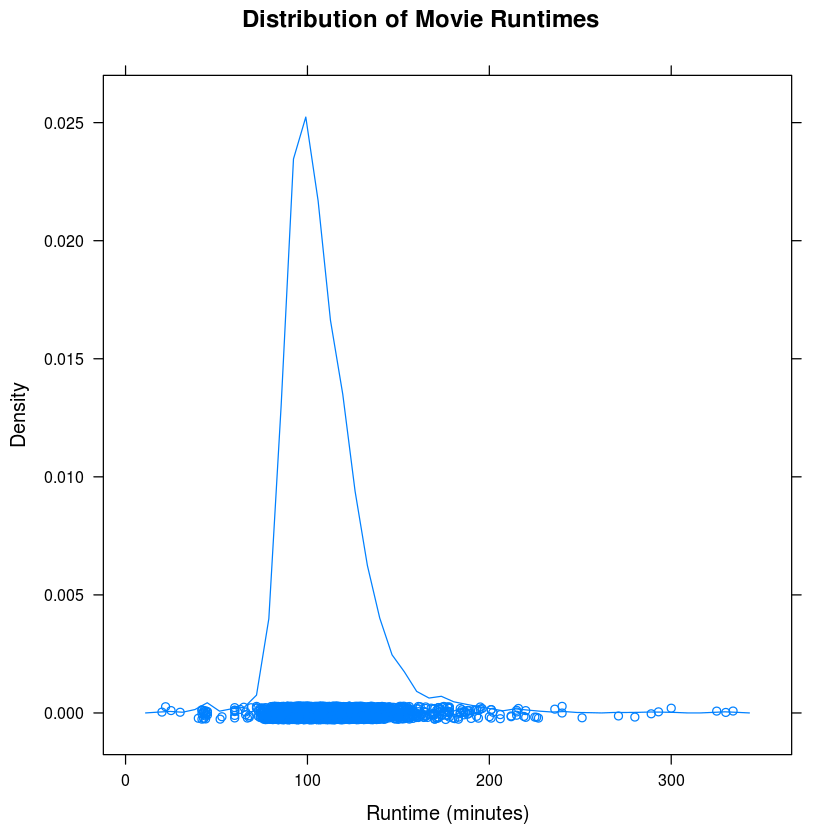

In [35]:
# Create density plot with lattice
densityplot(
    x = ~duration,
    data = movies,
    main = "Distribution of Movie Runtimes",
    xlab = "Runtime (minutes)")

In [52]:
# Create small multiples of all four
# NOTE: Not exactly lined up
dot <- dotplot(
    x = ~duration,
    data = movies,
    main = "Distribution of Movie Runtimes",
    xlab = "")


In [50]:
box <- bwplot(
    x = ~duration,
    data = movies,
    xlab = "")


In [48]:
hist <- histogram(
    x = ~duration,
    data = movies,
    xlab = "",
    ylab = "",
    scales = list(y = list(draw = FALSE)))



In [47]:
density <- densityplot(
    x = ~duration,
    data = movies,
    ylab = "",
    scales = list(y = list(draw = FALSE)))



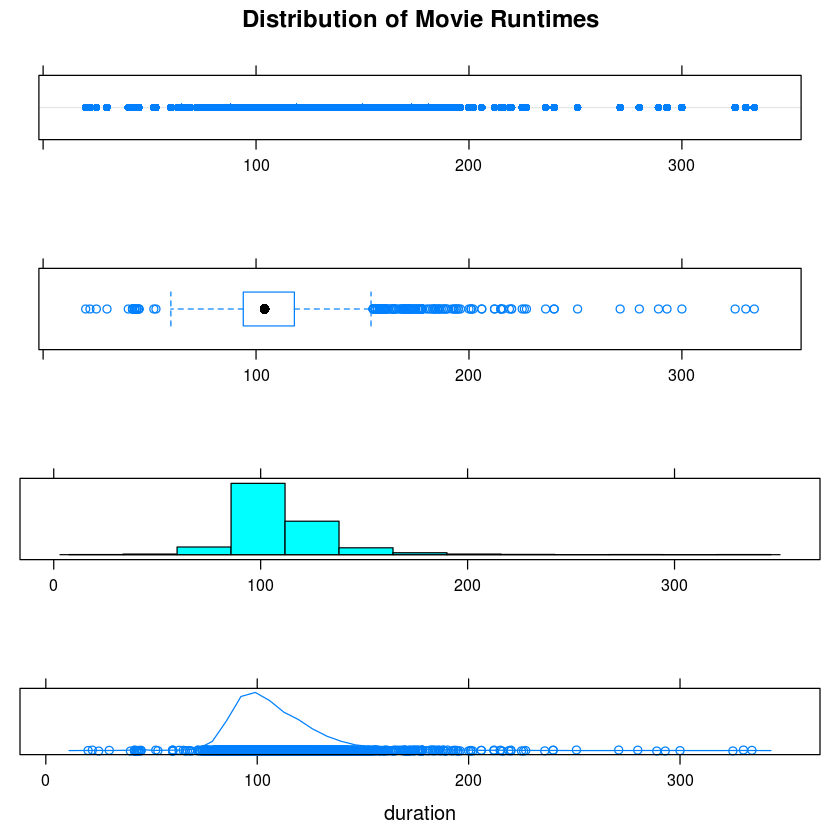

In [54]:
print(
    x = dot, 
    position = c(0, 0.75, 1, 1), 
    more = TRUE)
print(
    x = box, 
    position = c(0, 0.50, 1, 0.75), 
    more = TRUE)
print(
    x = hist, 
    position = c(0, 0.25, 1, 0.50),
    more = TRUE)


print(
    x = density, 
    position = c(0, 0, 1, 0.25))

** Qualatative Bivariate Analysis **

In [80]:
# create table that shows count of movies that have a rating of 5+/-
hscore <- movies[,c("imdb_score", "content_rating")]
# hscore <- table(ifelse(hscore$imdb_score>5, TRUE,FALSE), hscore$content_rating)
# hscore <- (hscore[,c("G", "Not Rated", "PG", "PG-13", "R", "TV-14")])
hscore <- table( hscore$content_rating, ifelse(hscore$imdb_score>5, TRUE,FALSE))
hscore <- (hscore[c("G", "Not Rated", "PG", "PG-13", "R", "TV-14"),])
hscore

           
            FALSE TRUE
  G            14   98
  Not Rated    15  101
  PG           97  604
  PG-13       178 1283
  R           160 1958
  TV-14         3   27

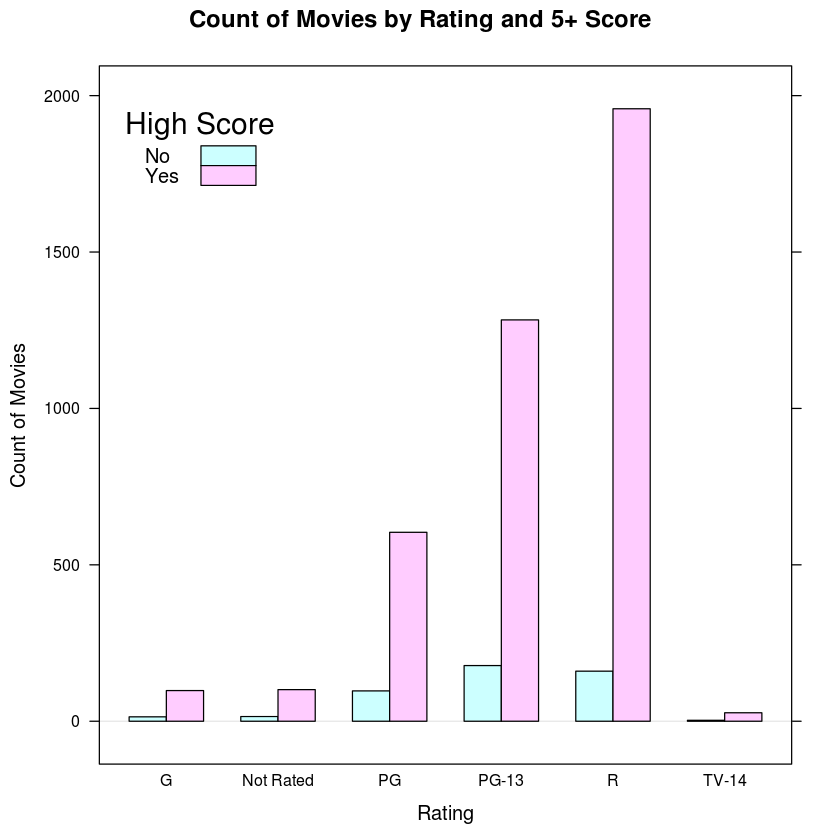

In [81]:
# Create a grouped frequency bar chart
barchart(
    x = hscore,
    stack = FALSE,
    horizontal = FALSE,
    groups  = TRUE,
    main = "Count of Movies by Rating and 5+ Score",
    xlab = "Rating",
    ylab = "Count of Movies",
    auto.key = list(
        x = 0.05,
        y = 0.95,
        title = "High Score",
        text = c("No", "Yes")))

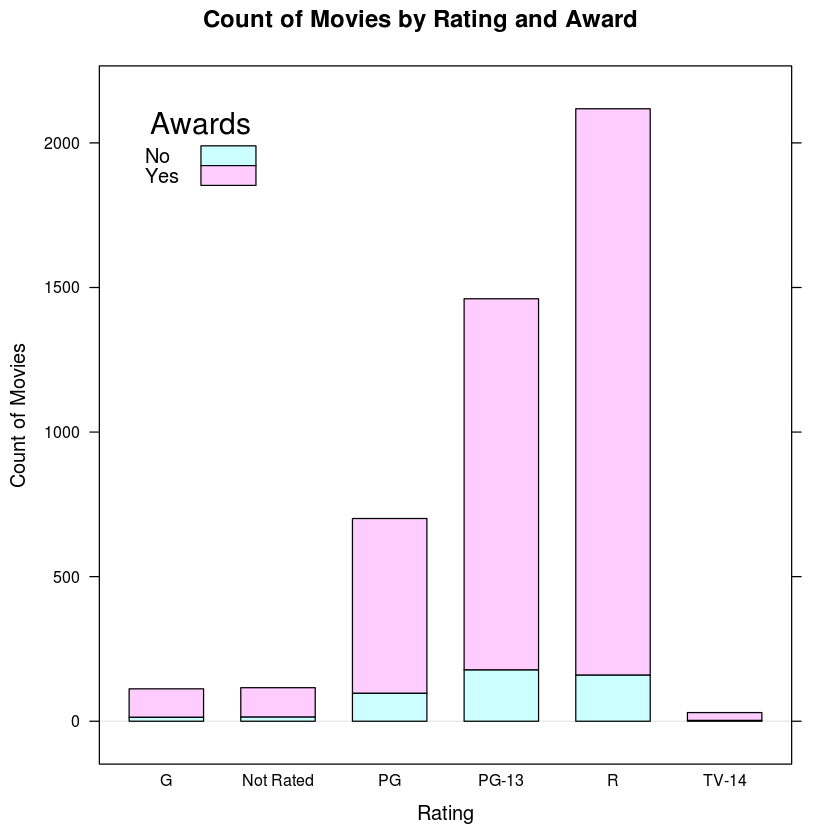

In [82]:
# Create a stacked frequency bar chart
barchart(
    x = hscore,
    stack = TRUE,
    horizontal = FALSE,
    main = "Count of Movies by Rating and Award",
    xlab = "Rating",
    ylab = "Count of Movies",
    auto.key = list(
        x = 0.05,
        y = 0.95,
        title = "Awards",
        text = c("No", "Yes")))

In [83]:
# create table that shows count of movies that have a rating of 5+/-
hscore <- movies[,c("imdb_score", "content_rating")]
hscore <- table(ifelse(hscore$imdb_score>5, TRUE,FALSE), hscore$content_rating)
hscore <- (hscore[,c("G", "Not Rated", "PG", "PG-13", "R", "TV-14")])
hscore

       
           G Not Rated   PG PG-13    R TV-14
  FALSE   14        15   97   178  160     3
  TRUE    98       101  604  1283 1958    27

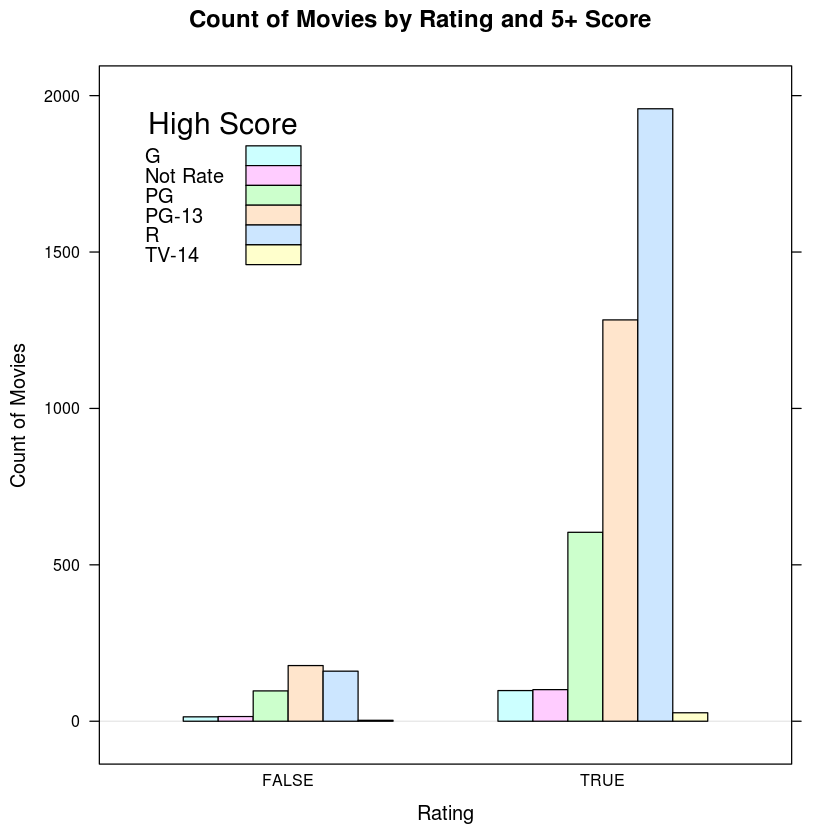

In [85]:
barchart(
    x = hscore,
    stack = FALSE,
    horizontal = FALSE,
    groups  = TRUE,
    main = "Count of Movies by Rating and 5+ Score",
    xlab = "Rating",
    ylab = "Count of Movies",
    auto.key = list(
        x = 0.05,
        y = 0.95,
        title = "High Score",
        text = c("G", "Not Rate", "PG", "PG-13", "R", "TV-14")))

In [88]:
# Create a proportional frequency table
hscore <- movies[,c("imdb_score", "content_rating")]
hscore <- table( hscore$content_rating, ifelse(hscore$imdb_score>5, TRUE,FALSE))
hscore <- (hscore[c("G", "Not Rated", "PG", "PG-13", "R", "TV-14"),])
proportions <- apply(hscore, 2, function(x) { x / sum(x) })

head(hscore)
head(proportions)

           
            FALSE TRUE
  G            14   98
  Not Rated    15  101
  PG           97  604
  PG-13       178 1283
  R           160 1958
  TV-14         3   27

,FALSE,TRUE
G,0.029978587,0.024072709
Not Rated,0.032119914,0.024809629
PG,0.207708779,0.148366495
PG-13,0.381156317,0.315155981
R,0.342612420,0.480962908
TV-14,0.006423983,0.006632277


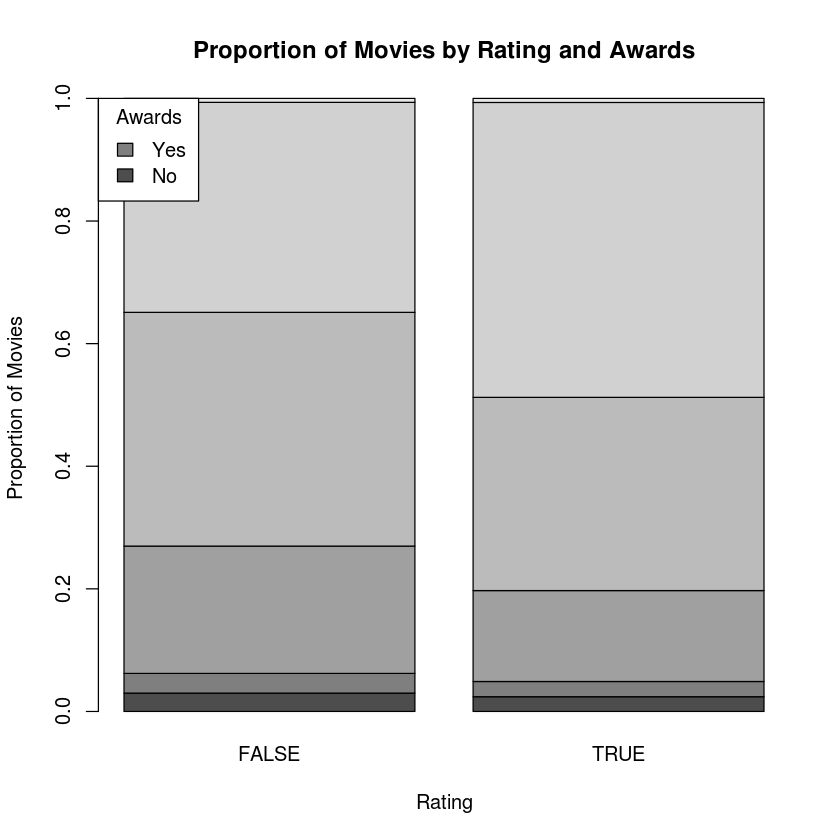

In [89]:
# Create a 100% stacked frequency bar chart
barplot(
    height = proportions,
    main = "Proportion of Movies by Rating and Awards",
    xlab = "Rating",
    ylab = "Proportion of Movies",
    legend = c("No", "Yes"),
    args.legend = list(
        x = "topleft",
        title = "Awards"))

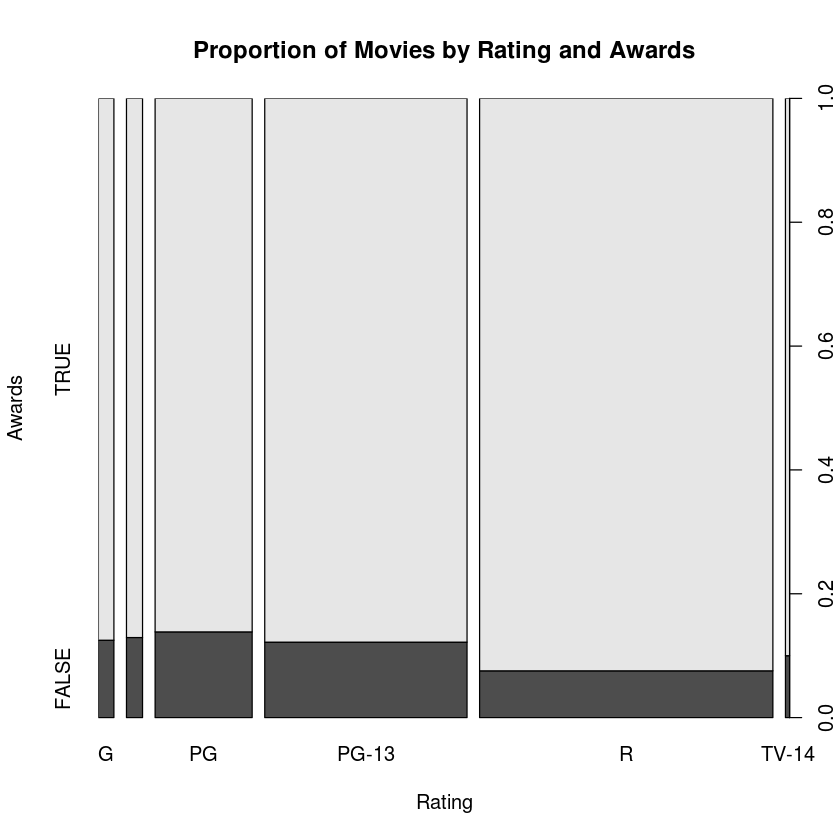

In [90]:
# Create a spineplot
spineplot(
    x = hscore,
    main = "Proportion of Movies by Rating and High Score",
    xlab = "Rating",
    ylab = "Awards")

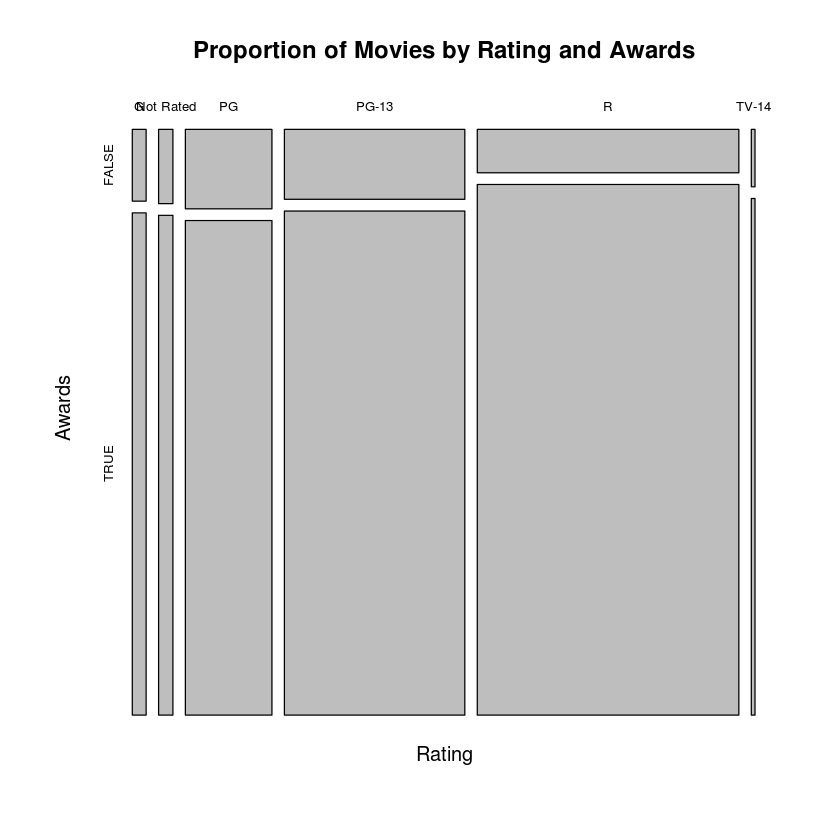

In [92]:
# Create a mosaic plot
mosaicplot(
    x = hscore,
    main = "Proportion of Movies by Rating and High Score",
    xlab = "Rating",
    ylab = "Awards")

**Bivariate Visualization of two quantitative variables **

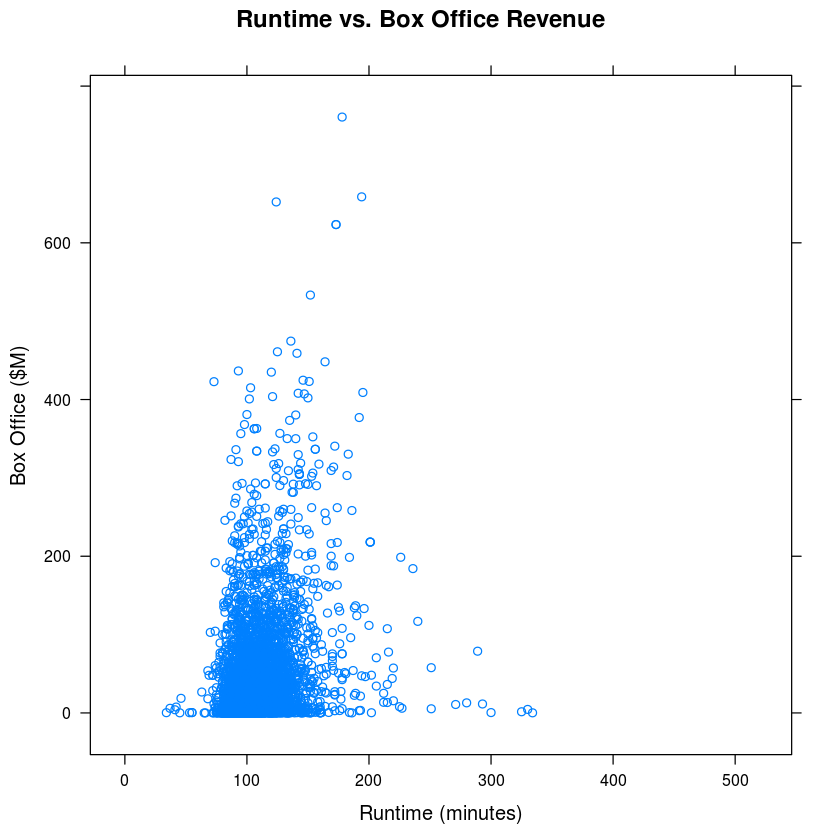

In [148]:
# Create a scatterplot
xyplot(
    x = gross ~ duration,
    data = movies,
    main = "Runtime vs. Box Office Revenue",
    xlab = "Runtime (minutes)",
    ylab = "Box Office ($M)")

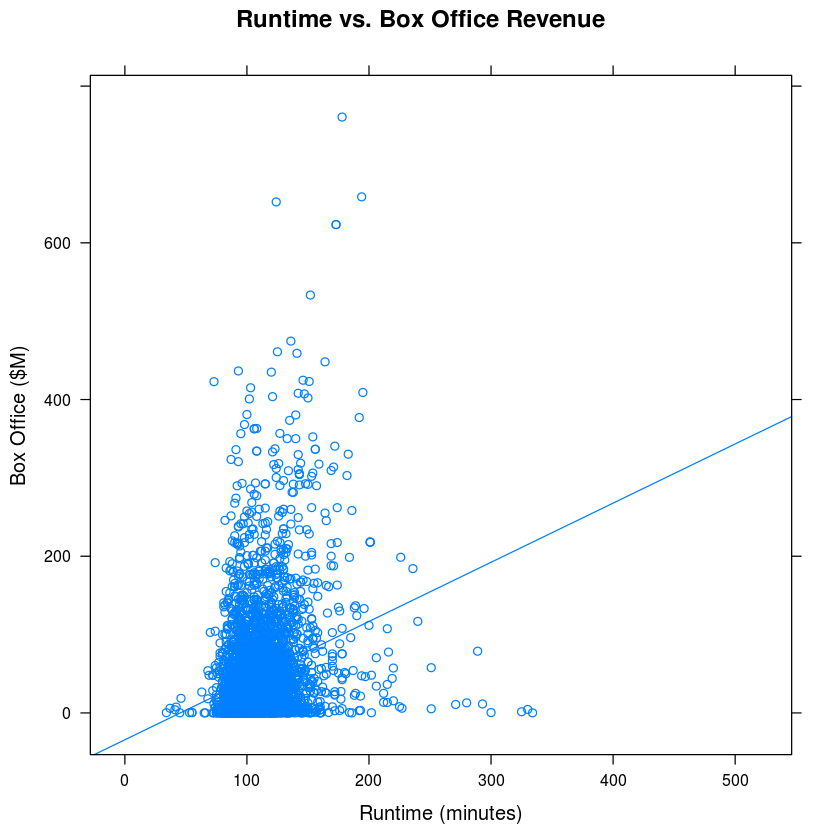

In [149]:
# Add a linear regression line
xyplot(
    x = gross ~ duration,
    data = movies,
    type = c("p", "r"),
    main = "Runtime vs. Box Office Revenue",
    xlab = "Runtime (minutes)",
    ylab = "Box Office ($M)")

In [95]:
# Load hexbin library
library(hexbin)

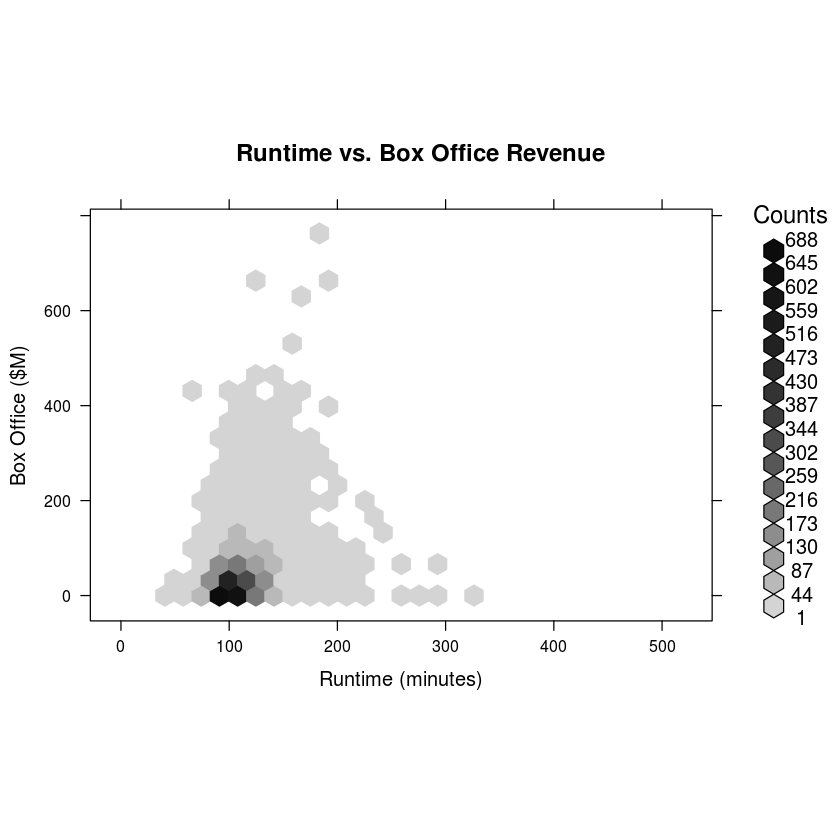

In [150]:
# Create hexagonal binned frequency heatmap
hexbinplot(
    x =  gross ~ duration,
    data = movies,
    xbins = 30,
    main = "Runtime vs. Box Office Revenue",
    xlab = "Runtime (minutes)",
    ylab = "Box Office ($M)")

In [151]:
library(MASS)
# Create a 2d kernel density estimation
movies <- movies[complete.cases(movies),]
density2d <- kde2d(
    x = movies$duration, 
    y = movies$gross, 
    n = 50)

In [152]:
# Create a grid from our 2D kernel density estimate

grid <- expand.grid(
    x = density2d$x,
    y = density2d$y)

grid$z <- as.vector(density2d$z)
# Display the data frame
head(grid)

x,y,z
37.00000,0.000162,1.158886e-06
42.97959,0.000162,1.416406e-06
48.95918,0.000162,1.430342e-06
54.93878,0.000162,1.172759e-06
60.91837,0.000162,6.663388e-07
66.89796,0.000162,2.480903e-06


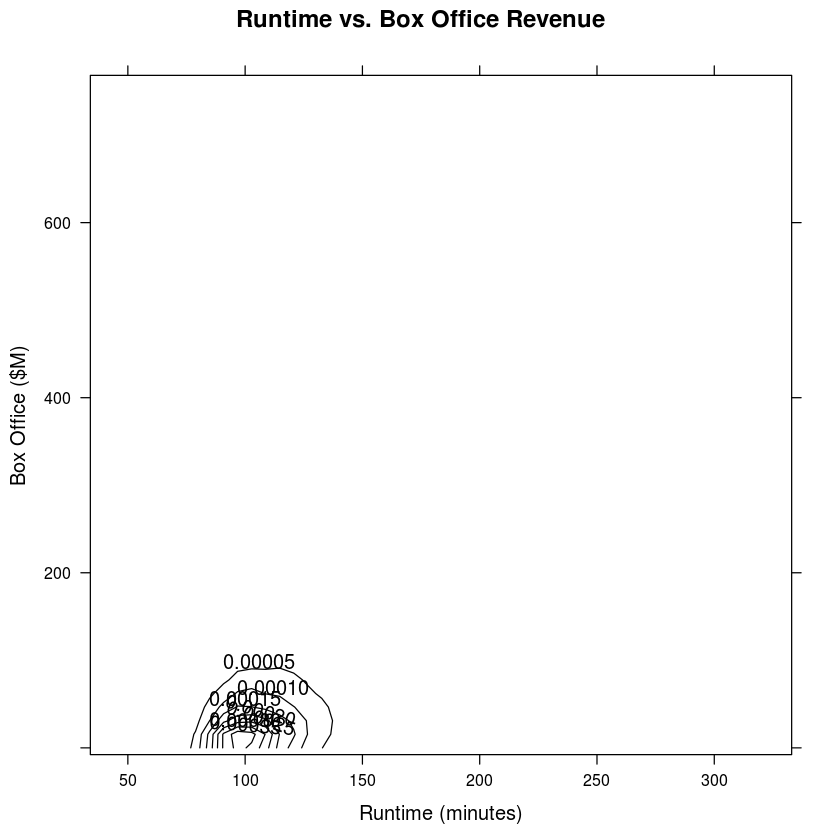

In [153]:
# Create a contour plot of density
contourplot(
    x = z ~ x * y,
    data = grid,
    main = "Runtime vs. Box Office Revenue",
    xlab = "Runtime (minutes)",
    ylab = "Box Office ($M)")

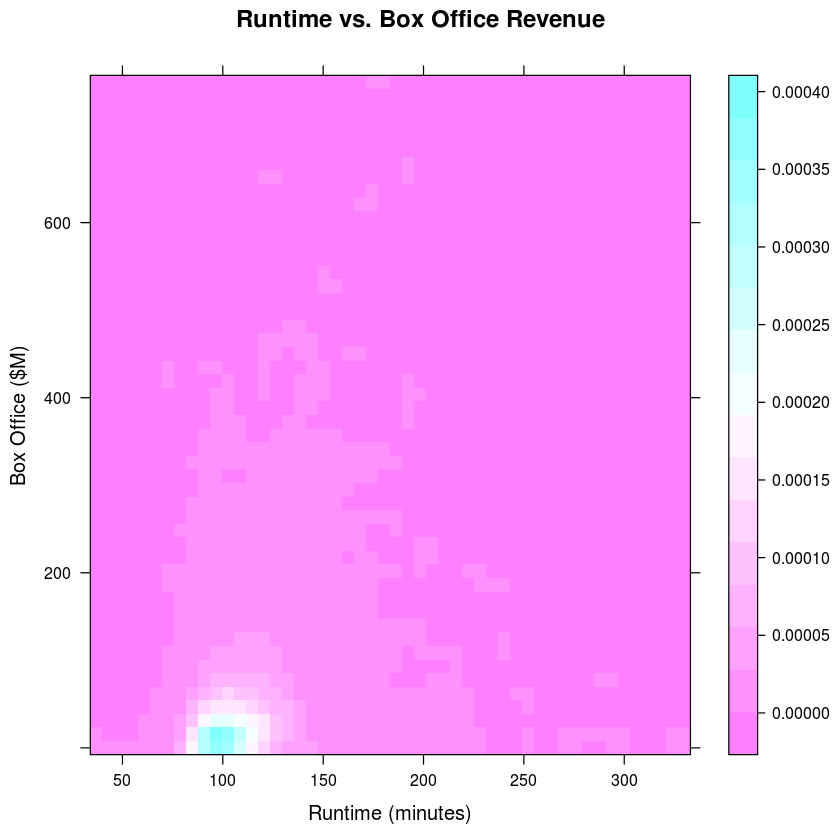

In [154]:
# Create a level plot of density
levelplot(
    x = z ~ x * y,
    data = grid,
    main = "Runtime vs. Box Office Revenue",
    xlab = "Runtime (minutes)",
    ylab = "Box Office ($M)")

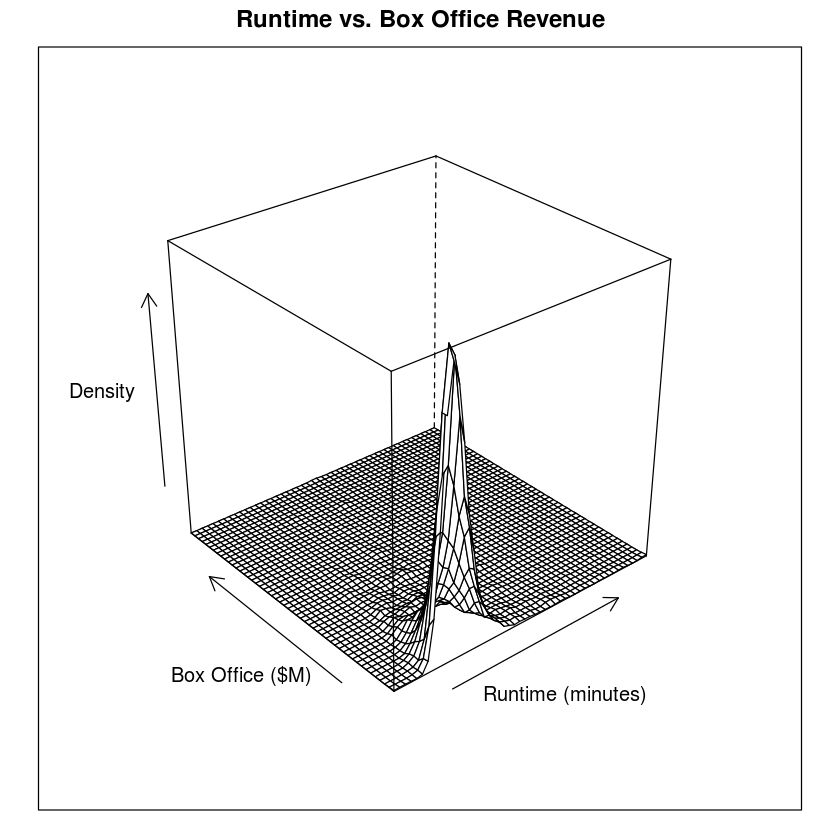

In [155]:
# Create mesh plot of density
wireframe(
    x = z ~ x * y,
    data = grid,
    main = "Runtime vs. Box Office Revenue",
    xlab = "Runtime (minutes)",
    ylab = "Box Office ($M)",
    zlab = "Density")

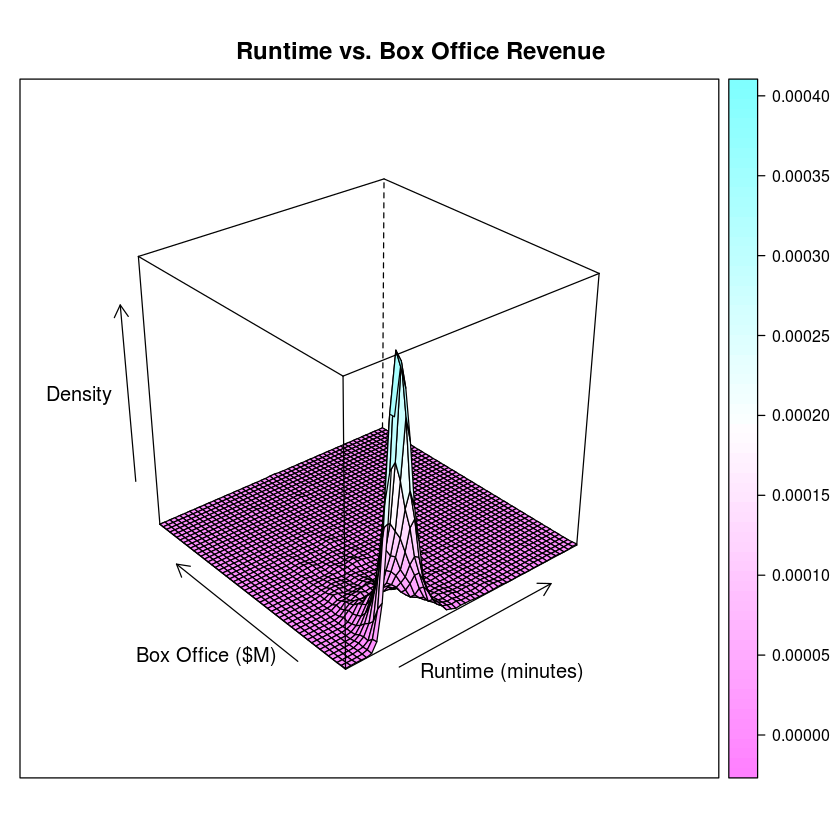

In [156]:
# Create surface plot of density
wireframe(
    x = z ~ x * y,
    data = grid,
    drape = TRUE,
    main = "Runtime vs. Box Office Revenue",
    xlab = "Runtime (minutes)",
    ylab = "Box Office ($M)",
    zlab = "Density")

In [157]:
# Create a step chart
movies <- movies[complete.cases(movies),]
moviesy <- aggregate(as.numeric(gross) ~ title_year, movies[movies$gross > 0,], sum)
colnames(moviesy)[2] <- "gross"
moviesy

title_year,gross
1927,0.026435
1929,2.808000
1933,2.300000
1935,3.000000
1936,0.163245
1937,184.925485
1939,220.857890
1940,84.300000
1946,44.050000
1947,0.007927


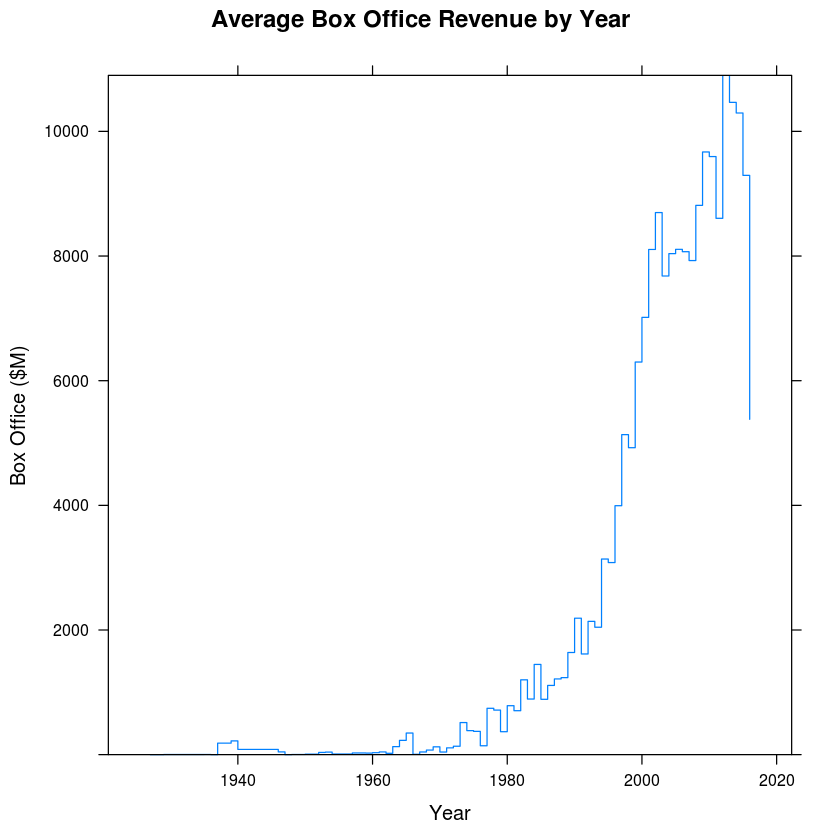

In [158]:
# Create a step chart
xyplot(
    x = gross ~ title_year,
    data = moviesy,
    type = "s",
    ylim = c(0, max(moviesy$gross)),
    main = "Average Box Office Revenue by Year",
    xlab = "Year",
    ylab = "Box Office ($M)")

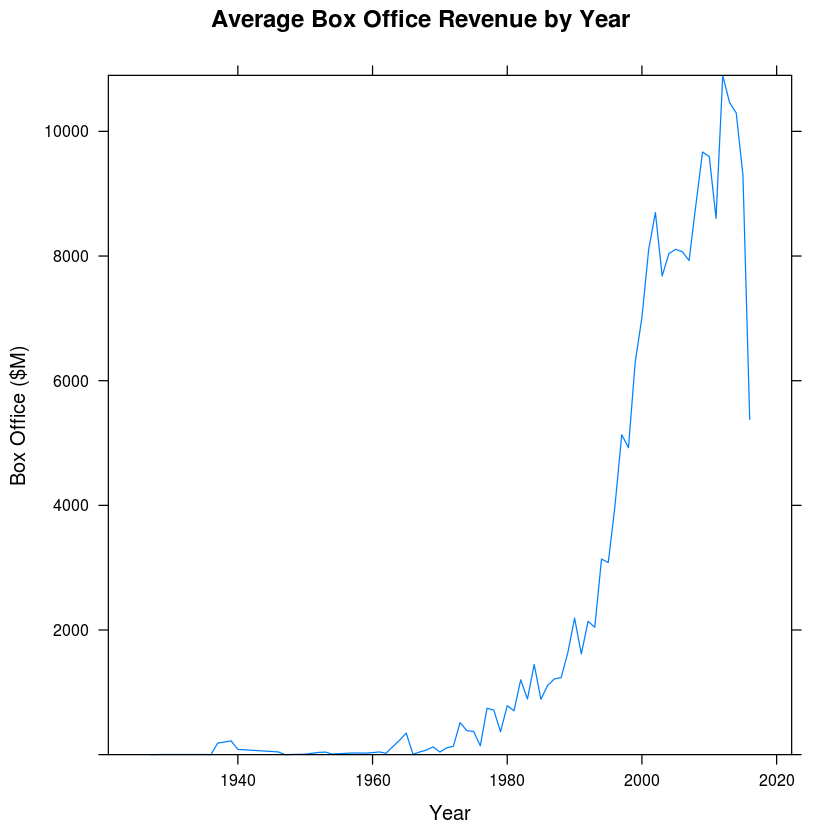

In [159]:
# Create a line chart
xyplot(
    x = gross ~ title_year,
    data = moviesy,
    type = "l",
    ylim = c(0, max(moviesy$gross)),
    main = "Average Box Office Revenue by Year",
    xlab = "Year",
    ylab = "Box Office ($M)")

In [135]:
# Download, install and load Lattice Extra package
#install.packages("latticeExtra")
library(latticeExtra)

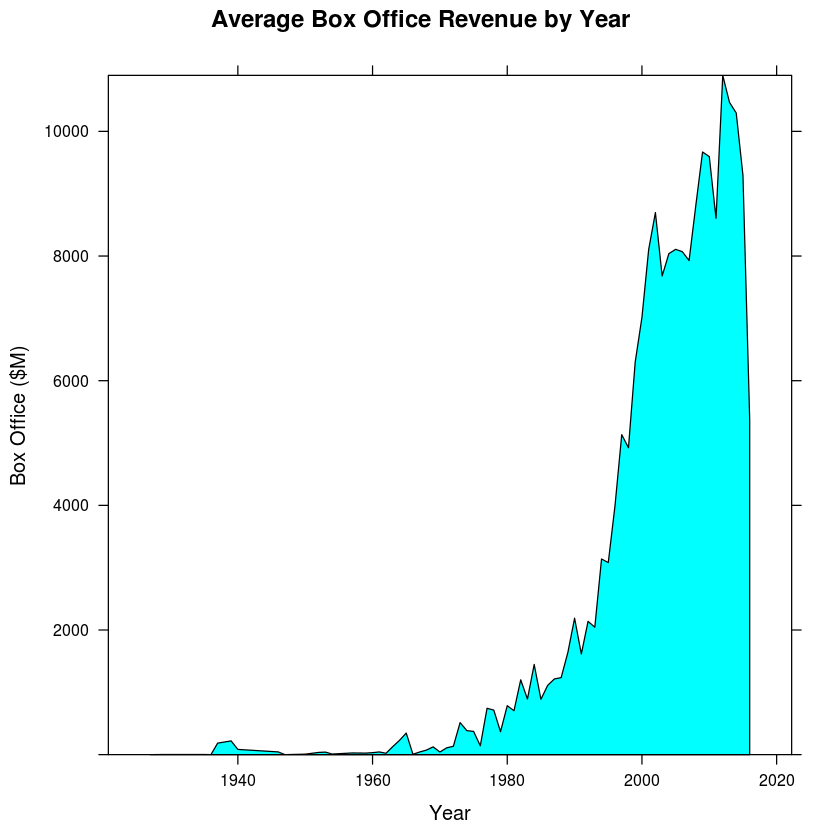

In [160]:
# Create an area chart
xyplot(
    x = gross ~ title_year,
    data = moviesy,
    panel = panel.xyarea,
    ylim = c(0, max(moviesy$gross)),
    main = "Average Box Office Revenue by Year",
    xlab = "Year",
    ylab = "Box Office ($M)")

** Qualitative and Quantative Bivariate Analysis **

In [141]:
# Download, install, and load the dplyr package
#install.packages("dplyr")
library(dplyr)

In [161]:
# Create table of average box office by rating
average <- movies %>%
    select(content_rating, gross) %>%
    group_by(content_rating) %>% 
    summarize(gross = mean(gross)) %>%
    as.data.frame()
average

content_rating,gross
Approved,44.931082
G,86.793282
GP,43.800000
M,62.554450
NC-17,4.476870
Not Rated,3.177088
Passed,11.003537
PG,77.351922
PG-13,68.965119
R,32.149839


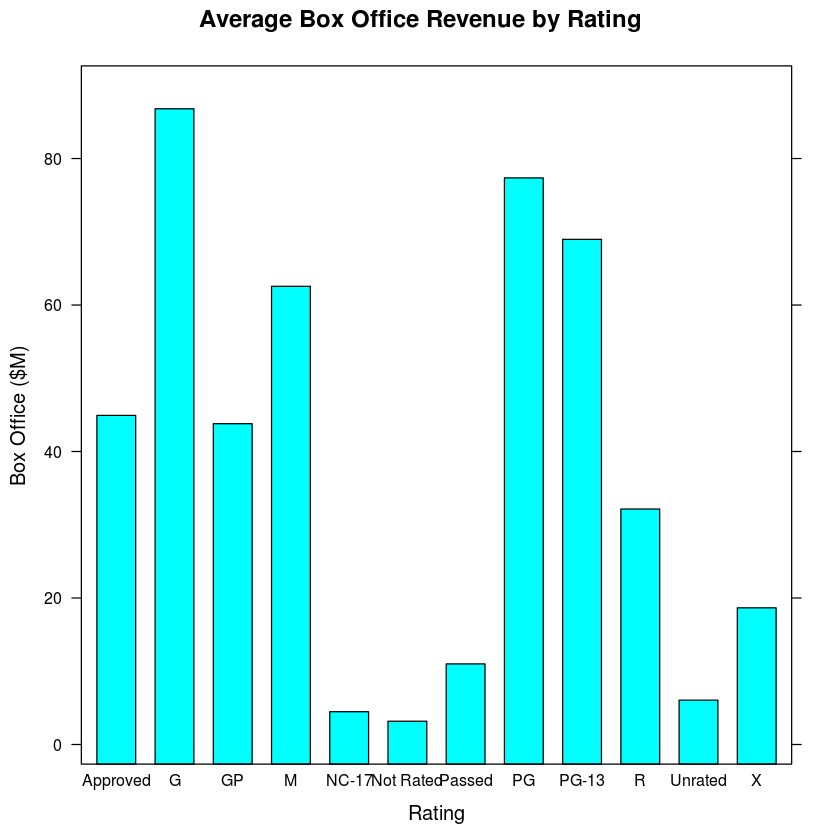

In [162]:
# Create a bivariate bar chart
barchart(
    x = gross ~ content_rating,
    data = average,
    main = "Average Box Office Revenue by Rating",
    xlab = "Rating",
    ylab = "Box Office ($M)")

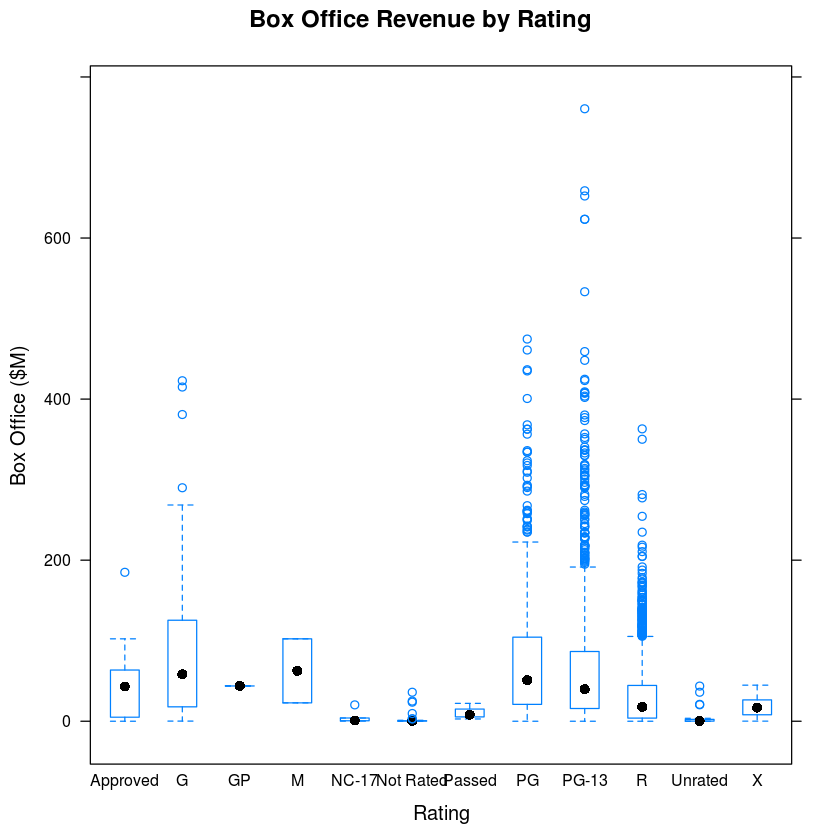

In [163]:
# Create a bivariate box plot
bwplot(
    x = gross ~ content_rating,
    data = movies,
    main = "Box Office Revenue by Rating",
    xlab = "Rating",
    ylab = "Box Office ($M)")

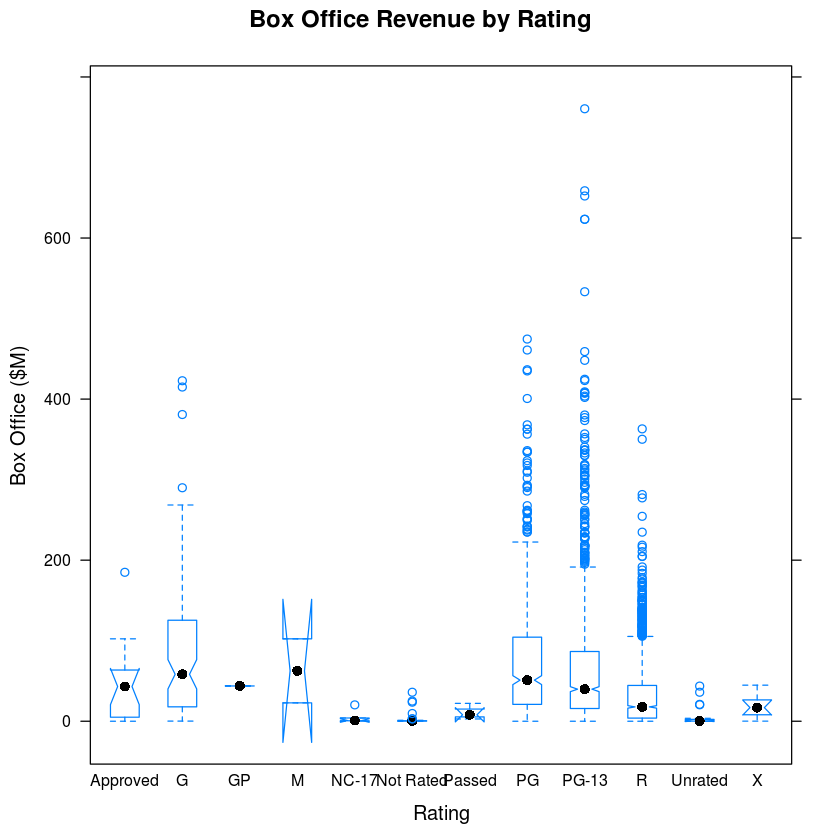

In [164]:
# Create a notched box plot
bwplot(
    x = gross ~ content_rating,
    data = movies,
    notch = TRUE,
    main = "Box Office Revenue by Rating",
    xlab = "Rating",
    ylab = "Box Office ($M)")

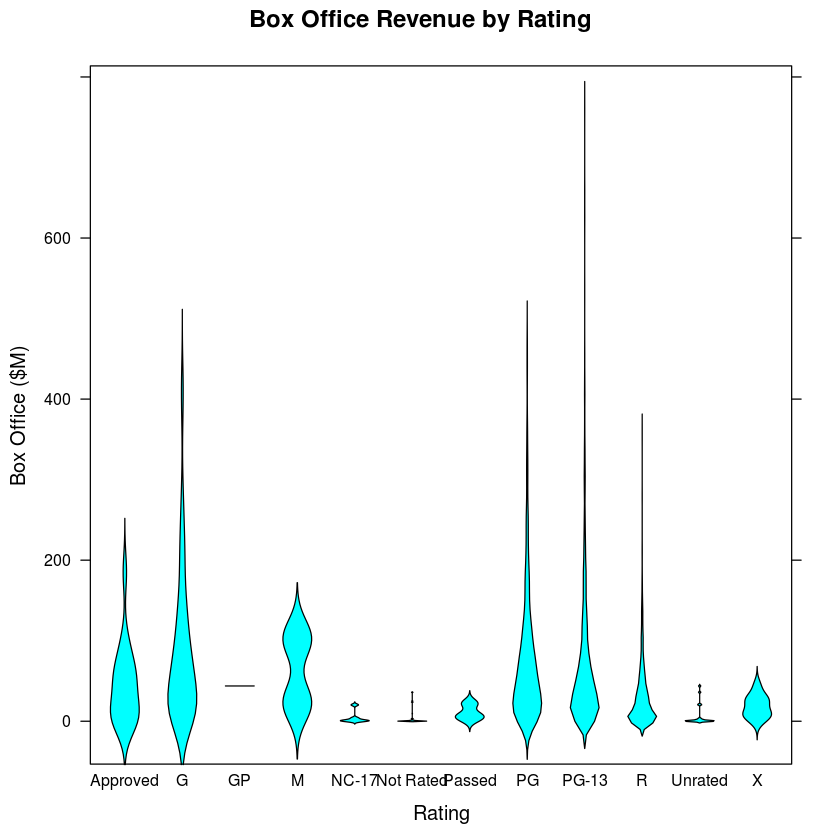

In [165]:
# Create a violin plot
bwplot(
    x = gross ~ content_rating,
    data = movies,
    panel = panel.violin,
    main = "Box Office Revenue by Rating",
    xlab = "Rating",
    ylab = "Box Office ($M)")